In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# context = pd.read_csv('..//data/preprocessed//context_1217_1230.csv')
context = pd.read_csv('/home/jovyan/df-smart-channel/graph/data/preprocessed/context_1217_0131.csv')

In [3]:
le = LabelEncoder()
context.cust_no = le.fit_transform(context.cust_no)
context.item_id = le.fit_transform(context.item_id)

In [4]:
user_list = context.cust_no.unique()
item_list = context.item_id.unique()

In [20]:
len(user_list)

576702

## Check proportion

In [6]:
train_start = 20211217; train_end = 20211225; test_end = 20211226
test_date = test_end

In [7]:
context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
trainUniqueUsers = set(context_train.cust_no.unique())
context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
# grouped = context_test.groupby('cust_no')['is_in_train'].mean()

In [8]:
cust_category_train = context_train.groupby('cust_no')['click'].sum().reset_index()

In [9]:
cust_category_train['show_and_click'] = cust_category_train.click > 0

In [10]:
cust_category_train.show_and_click.value_counts()

False    441968
True       8852
Name: show_and_click, dtype: int64

In [11]:
441968+8852

450820

In [12]:
context_test.cust_no.nunique()

74794

In [13]:
# test
context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
cust_category_test = context_test.groupby('cust_no')['is_in_train'].mean().reset_index()

In [28]:
can_be_transducted = context_test[context_test.is_in_train]
can_be_transducted['if_click'] = can_be_transducted.click > 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
can_be_transducted_w_click = can_be_transducted.groupby('cust_no')['if_click'].mean().reset_index()

In [39]:
can_be_transducted_w_click.if_click.value_counts()

0.0    53494
1.0      481
0.5       70
Name: if_click, dtype: int64

In [40]:
53494+481+70

54045

In [14]:
cust_category_test.is_in_train.value_counts()

True     54045
False    20749
Name: is_in_train, dtype: int64

In [16]:
54045+20749

74794

In [24]:
cust_category_test

,cust_no,is_in_train
0,0,True
1,21,False
2,35,True
3,45,False
4,63,True
...,...,...
74789,576669,False
74790,576687,False
74791,576689,True
74792,576691,True


In [17]:
can_transducted = cust_category_test[cust_category_test['is_in_train']]

In [18]:
can_transducted.head()

,cust_no,is_in_train
0,0,True
2,35,True
4,63,True
5,69,True
6,73,True


In [21]:
can_transducted['if_click'] = can_transducted.is_in_train > 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
can_transducted.if_click.value_counts()

True    54045
Name: if_click, dtype: int64

## Check rough baseline

In [6]:
train_start = 20211217; train_end = 20211225; test_end = 20211226
test_date = test_end

In [7]:
context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
trainUniqueUsers = set(context_train.cust_no.unique())
context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
context_test['if_click'] = context_test.click > 0
# context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
# grouped = context_test.groupby('cust_no')['is_in_train'].mean()

In [9]:
grouped = context_test.groupby('cust_no')['if_click'].mean()

In [17]:
grouped.value_counts()

0.0    73990
1.0      728
0.5       76
Name: if_click, dtype: int64

In [19]:
54045+20749

74794

In [18]:
73990+728+76

74794

## Splitting

In [6]:
train_start = 20211217
train_end = 20211225
test_end = 20211226
test_date = test_end

In [7]:
## old version
# def splitting(user_list, train_start, test_date):
#     context_train = context_click[(context_click.date >= train_start) & (context_click.date < test_date)][['cust_no', 'item_id', 'show', 'click']]
#     context_test = context_click[context_click.date == test_date][['cust_no', 'item_id', 'show', 'click']]
    
#     cust_item_pair_train = context_train.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()
#     cust_item_pair_test = context_test.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()
    
#     # cust_item_pair_train = cust_item_pair_train[cust_item_pair_train.click > 0]
#     # cust_item_pair_test = cust_item_pair_test[cust_item_pair_test.click > 0]
    
#     trainUniqueUsers = set(cust_item_pair_train.cust_no.unique())
#     # testUniqueUsers = set(cust_item_pair_test.cust_no.unique())
#     cust_item_pair_test = cust_item_pair_test[cust_item_pair_test.cust_no.isin(trainUniqueUsers)]
    
#     items_by_cust_train = cust_item_pair_train.groupby('cust_no')['item_id'].unique()
#     items_by_cust_test = cust_item_pair_test.groupby('cust_no')['item_id'].unique()
    
#     cust_items_dict_train = dict(items_by_cust_train.apply(list))
#     cust_items_dict_test = dict(items_by_cust_test.apply(list))
#     return cust_items_dict_train, cust_items_dict_test

In [8]:
context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
trainUniqueUsers = set(context_train.cust_no.unique())
context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
# cust_item_pair_train = context_train.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()
# cust_item_pair_test = context_test.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()

# cust_no = context_test.cust_no.unique()
# init_df = pd.DataFrame({'cust_no': cust_no})

# combined_test = pd.merge(init_df, cust_item_pair_train, on = 'cust_no', how = 'left')[['cust_no', 'item_id']]
# combined_test.item_id = combined_test.item_id.replace(np.nan, -1)

In [9]:
context_test

,cust_no,item_id,click,is_in_train
70,5255,19,0,True
73,5544,19,0,True
84,6330,14,0,True
91,7036,8,0,True
100,7436,14,0,True
...,...,...,...,...
1546474,575491,3,0,True
1546509,120816,10,1,False
1546520,205332,8,1,False
1546529,226528,3,1,True


In [10]:
grouped = context_test.groupby('cust_no')['is_in_train'].mean()
grouped.value_counts()

True     54045
False    20749
Name: is_in_train, dtype: int64

In [116]:
del res

In [24]:
context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
trainUniqueUsers = set(context_train.cust_no.unique())
context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
grouped = context_test.groupby('cust_no')['is_in_train'].mean()
res = grouped.value_counts()

In [25]:
res

True     54045
False    20749
Name: is_in_train, dtype: int64

In [41]:
def splitting(user_list, train_start, test_date):
    context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
    trainUniqueUsers = set(context_train.cust_no.unique())
    context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
    context_test['is_in_train'] = context_test.cust_no.isin(trainUniqueUsers)
    grouped = context_test.groupby('cust_no')['is_in_train'].mean()
    res = grouped.value_counts()
    return res

In [42]:
res_dict = {}
res_dict['test_date'] = []
res_dict['ncust_in_train'] = []
res_dict['ncust_in_test'] = []
for test_date in range(20211226, 20211231+1):
    res = splitting(user_list = user_list, train_start = test_date-9, test_date = test_date)
    res_dict['test_date'].append(test_date)
    res_dict['ncust_in_train'].append(res[1])
    res_dict['ncust_in_test'].append(res[0])
res_df = pd.DataFrame.from_dict(res_dict)
res_df['ncust_total'] = res_df['ncust_in_train'] + res_df['ncust_in_test'] 
res_df['trans_prop'] = res_df['ncust_in_train'] / res_df['ncust_total'] 
    # export_file(date = str(test_date), pairs_dict_train = cust_items_dict_train, pairs_dict_test = cust_items_dict_test )

In [43]:
res_df

,test_date,ncust_in_train,ncust_in_test,ncust_total,trans_prop
0,20211226,54045,20749,74794,0.722585
1,20211227,86832,30503,117335,0.740035
2,20211228,96309,31979,128288,0.750725
3,20211229,94460,29430,123890,0.762451
4,20211230,63635,19327,82962,0.767038
5,20211231,36016,10816,46832,0.769047


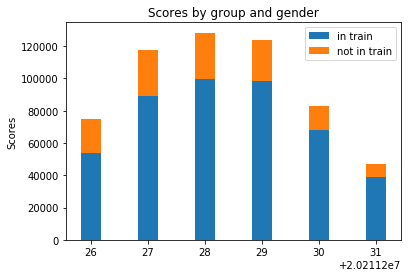

In [13]:
fig, ax = plt.subplots()
width = 0.35
ax.bar(res_df.test_date, res_df.ncust_in_train, width, label='in train')
ax.bar(res_df.test_date, res_df.ncust_in_test, width, bottom=res_df.ncust_in_train,label='not in train')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [16]:
def splitting(user_list, train_start, test_date):
    context_train = context[(context.date >= train_start) & (context.date < test_date)][['cust_no', 'item_id', 'show','click']]
    trainUniqueUsers = set(context_train.cust_no.unique())
    context_test = context[context.date == test_date][['cust_no', 'item_id','click']]
    context_test = context_test[context_test.cust_no.isin(trainUniqueUsers)]

    cust_item_pair_train = context_train.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()
    cust_item_pair_test = context_test.groupby(['cust_no', 'item_id'])['click'].sum().reset_index()

    cust_no = context_train.cust_no.unique()
    init_df = pd.DataFrame({'cust_no': cust_no})

    combined_train = pd.merge(init_df, cust_item_pair_train, on = 'cust_no', how = 'left')[['cust_no', 'item_id']]
    # combined_train.item_id = combined_train.item_id.astype(int)
    combined_test = pd.merge(init_df, cust_item_pair_test, on = 'cust_no', how = 'left')[['cust_no', 'item_id']]
    combined_test.item_id = combined_test.item_id.replace(np.nan, -1)
    
    combined_test['not_in_train'] = combined_test.item_id == -1
    grouped = combined_test.groupby('cust_no')['not_in_train'].mean()
    res = grouped.value_counts()
    return res

In [ ]:
res_df

In [17]:
res_dict = {}
res_dict['test_date'] = []
res_dict['ncust_in_train'] = []
res_dict['ncust_in_test'] = []
for test_date in range(20211226, 20211231+1):
    res = splitting(user_list = user_list, train_start = 20211217, test_date = test_date)
    res_dict['test_date'].append(test_date)
    res_dict['ncust_in_train'].append(res[0])
    res_dict['ncust_in_test'].append(res[1])
res_df = pd.DataFrame.from_dict(res_dict)
    # export_file(date = str(test_date), pairs_dict_train = cust_items_dict_train, pairs_dict_test = cust_items_dict_test )

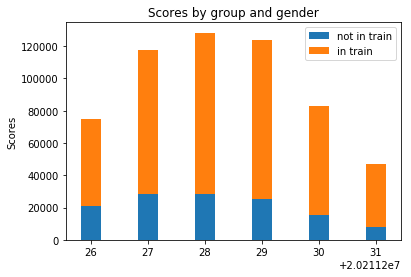

In [106]:
fig, ax = plt.subplots()
width = 0.35
ax.bar(res_df.test_date, res_df.ncust_in_train, width, label='not in train')
ax.bar(res_df.test_date, res_df.ncust_in_test, width, bottom=res_df.ncust_in_train,label='in train')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [11]:
test_date = 20211226
cust_items_dict_train, cust_items_dict_test = splitting(user_list = user_list, train_start = 20211217, test_date = test_date) 
# export_file(date = str(test_date), pairs_dict_train = cust_items_dict_train, pairs_dict_test = cust_items_dict_test )
len_tr = len(list(cust_items_dict_train.keys()))
len_te = len(list(cust_items_dict_test.keys()))
print(len_tr)
print(len_te)
print('---')

450820
54045
---


In [9]:
for test_date in range(20211226, 20211231+1):
    cust_items_dict_train, cust_items_dict_test = splitting(user_list = user_list, train_start = 20211217, test_date = test_date) 
    export_file(date = str(test_date), pairs_dict_train = cust_items_dict_train, pairs_dict_test = cust_items_dict_test )
    len_tr = len(list(cust_items_dict_train.keys()))
    len_te = len(list(cust_items_dict_test.keys()))
    print(len_tr)
    print(len_te)
    print('---')

write to file path: <_io.TextIOWrapper name='date=20211226/train.txt' mode='w' encoding='UTF-8'>
450820
write to file path: <_io.TextIOWrapper name='date=20211226/test.txt' mode='w' encoding='UTF-8'>
54045
450820
54045
---
write to file path: <_io.TextIOWrapper name='date=20211227/train.txt' mode='w' encoding='UTF-8'>
471569
write to file path: <_io.TextIOWrapper name='date=20211227/test.txt' mode='w' encoding='UTF-8'>
89054
471569
89054
---
write to file path: <_io.TextIOWrapper name='date=20211228/train.txt' mode='w' encoding='UTF-8'>
499850
write to file path: <_io.TextIOWrapper name='date=20211228/test.txt' mode='w' encoding='UTF-8'>
99623
499850
99623
---
write to file path: <_io.TextIOWrapper name='date=20211229/train.txt' mode='w' encoding='UTF-8'>
528515
write to file path: <_io.TextIOWrapper name='date=20211229/test.txt' mode='w' encoding='UTF-8'>
98595
528515
98595
---
write to file path: <_io.TextIOWrapper name='date=20211230/train.txt' mode='w' encoding='UTF-8'>
553810
writ

In [12]:
# for test_date in range(20211226, 20211231+1):
#     cust_items_dict_train, cust_items_dict_test = splitting(user_list = user_list, train_start = 20211217, test_date = test_date) 
#     len_tr = len(list(cust_items_dict_train.keys()))
#     len_te = len(list(cust_items_dict_test.keys()))
#     print(len_tr)
#     print(len_te)
#     print('---')

8852
50
---
9606
105
---
10964
124
---
12372
114
---
13693
64
---
14486
47
---
